In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import plot_tree
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных

In [ ]:
from sklearn.datasets import load_breast_cancer
data_cancer = load_breast_cancer()

In [ ]:
df = pd.DataFrame(data_cancer.data, columns=data_cancer.feature_names)
X = df
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Анализ данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
df['type'] = data_cancer.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<Axes: >

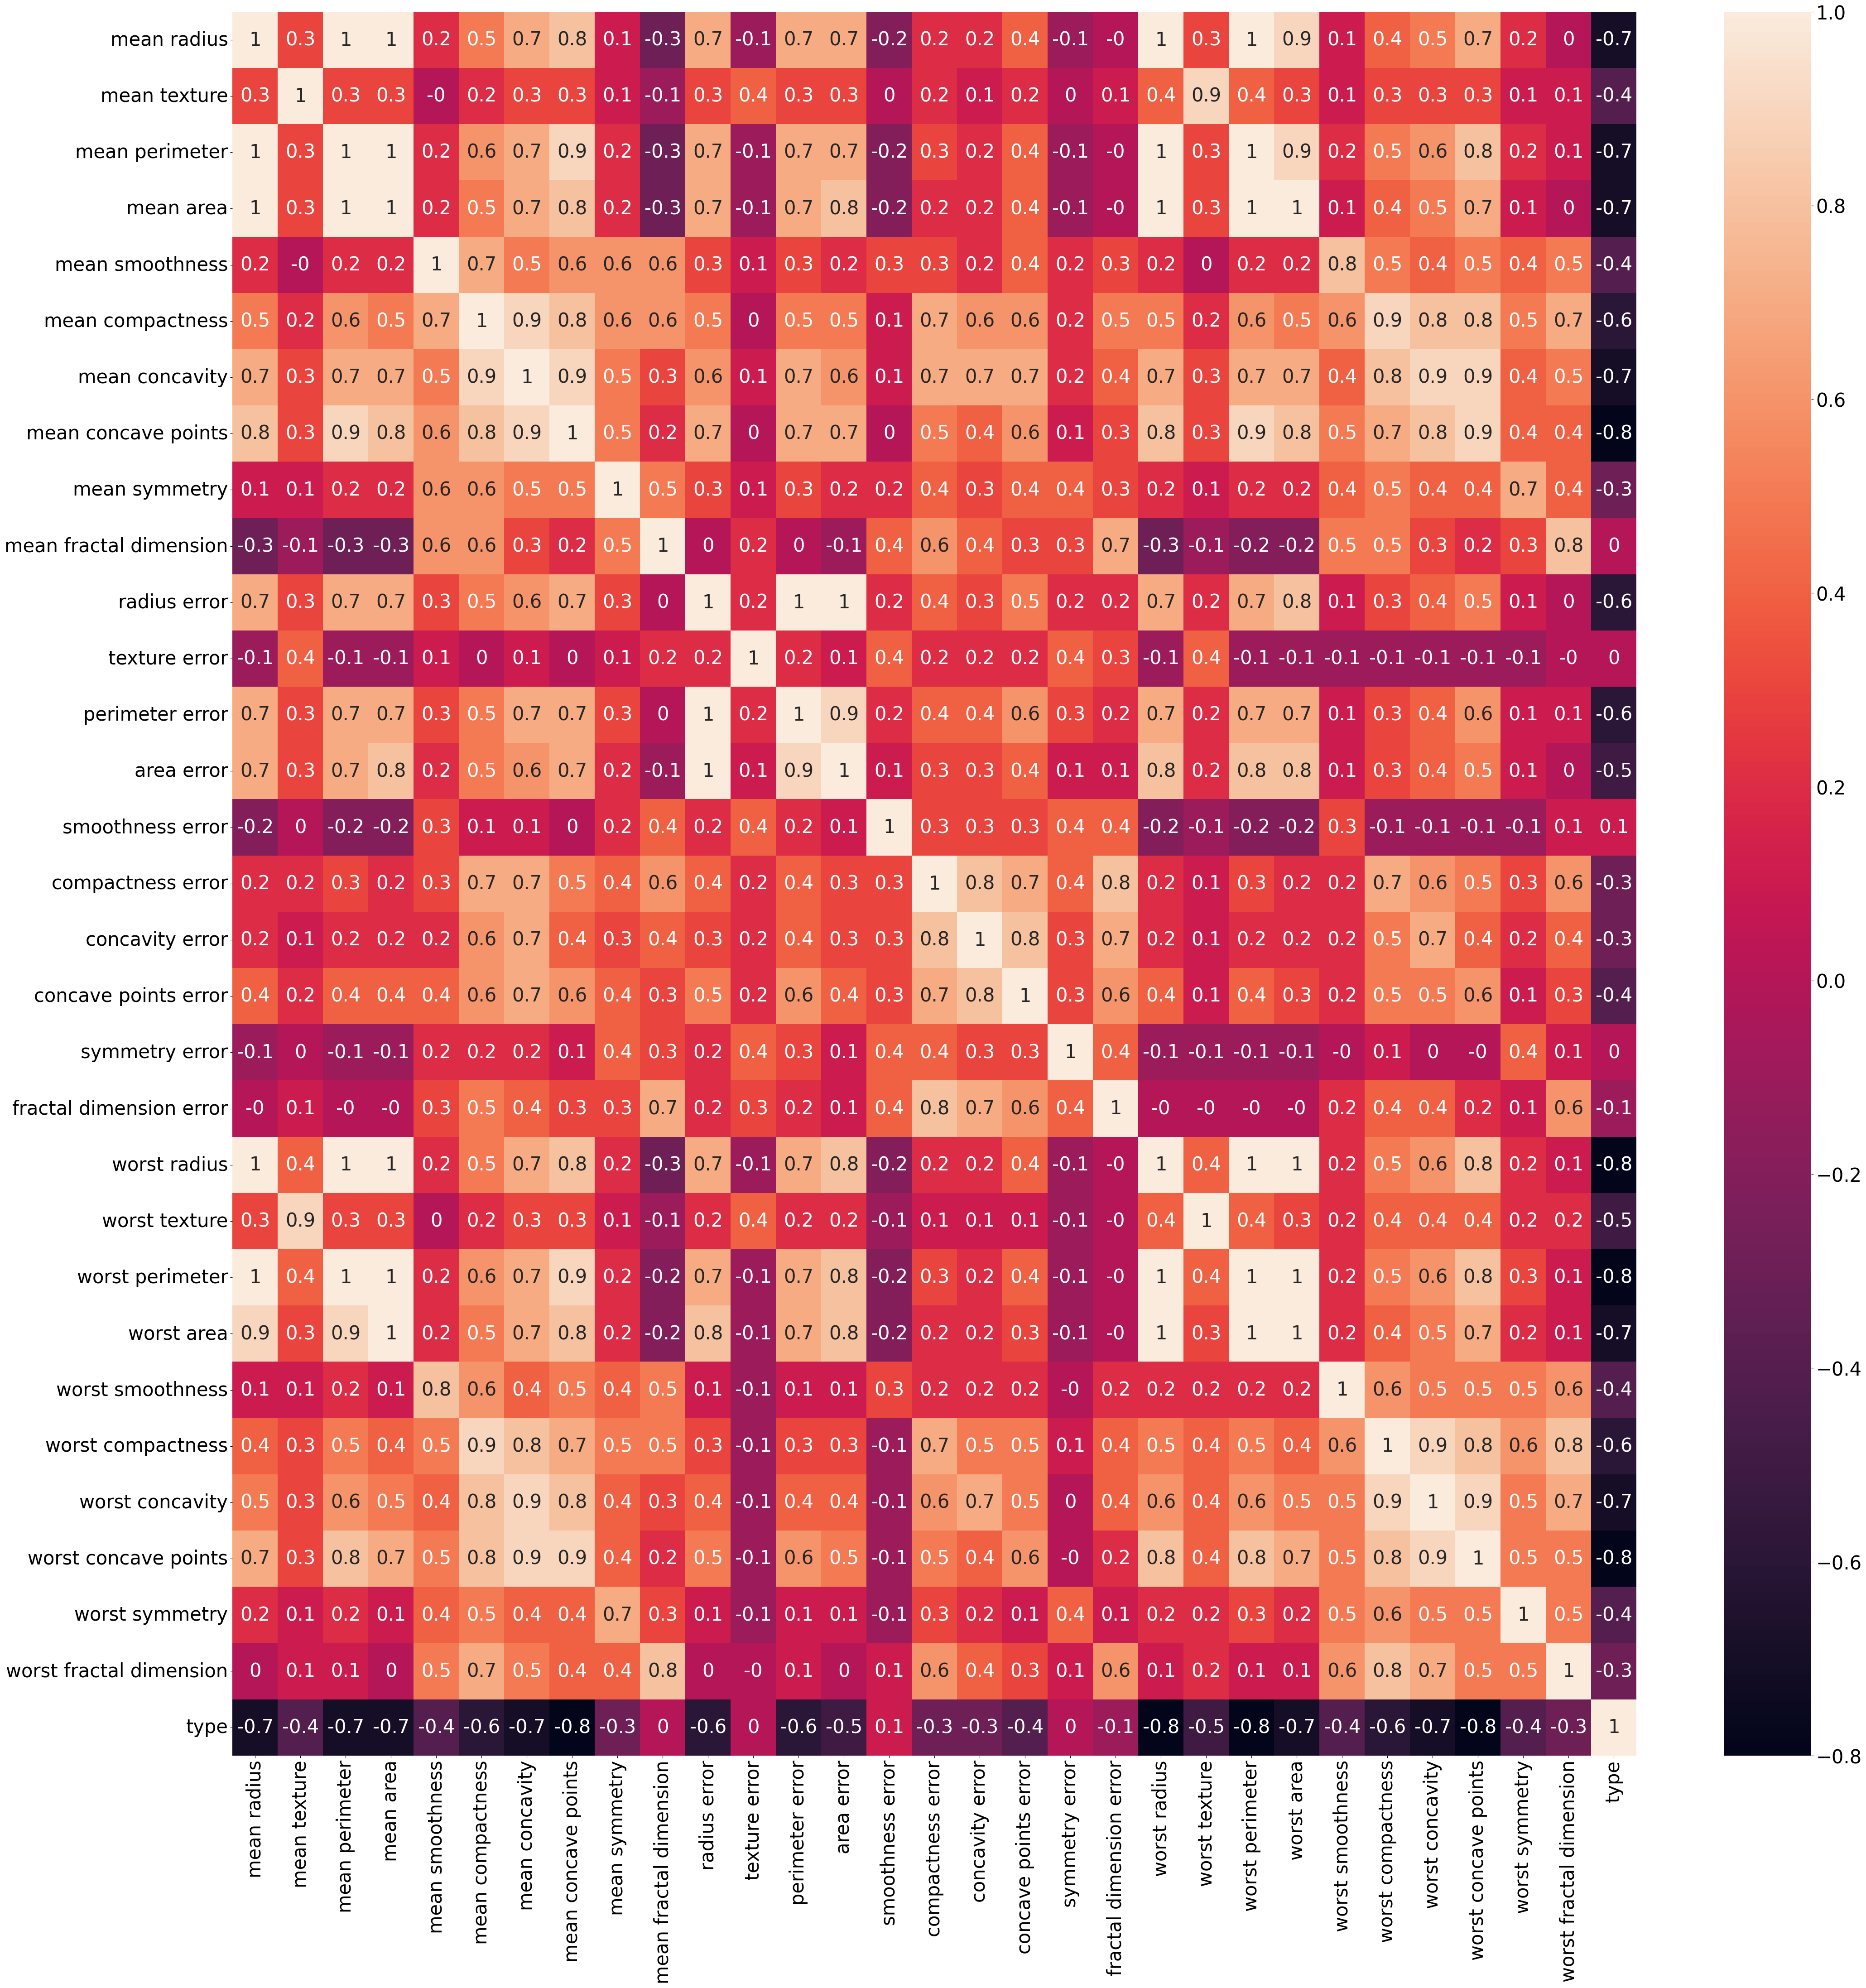

In [ ]:
plt.rcParams.update({'font.size': 30})
plt.figure(figsize=(50,50))
dfc=df.corr().round(1)
sns.heatmap(data=dfc,annot=True)

# Разделим датасет

In [ ]:
Y=df['type']
Y

,type
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [ ]:
X=df.drop(['type'],axis=1)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=5)
X_train.shape

(512, 30)

# Создание моделей

## DesicionTree

In [ ]:
dtf = DecisionTreeClassifier(random_state=0)
dtf.fit(X_train,Y_train)
pred_1=dtf.predict(X_test)
print('accuracy',accuracy_score(Y_test,pred_1))
print('precision',precision_score(Y_test,pred_1))
print('recall',recall_score(Y_test,pred_1))

df1=pd.crosstab(Y_test,pred_1)
df1

accuracy 0.9649122807017544
precision 0.9736842105263158
recall 0.9736842105263158


col_0,0,1
type,,
0,18,1
1,1,37


In [ ]:
print(classification_report(Y_test,pred_1))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.97      0.97      0.97        38

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



Построим кривые ROC

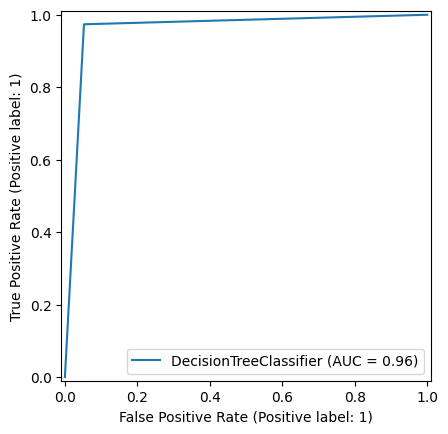

In [ ]:
plt.rcParams.update({'font.size': 10})
dtf_disp = RocCurveDisplay.from_estimator(dtf, X_test, Y_test)
plt.show()

Выводим важность признаков в этой модели

In [ ]:
dtf.feature_importances_

array([0.0055441 , 0.06612348, 0.        , 0.        , 0.        ,
       0.        , 0.01446831, 0.03522131, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01051071, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.68011314, 0.00828717, 0.        , 0.00913145, 0.00815656,
       0.        , 0.00756948, 0.14675396, 0.        , 0.00812033])

Строим дерево

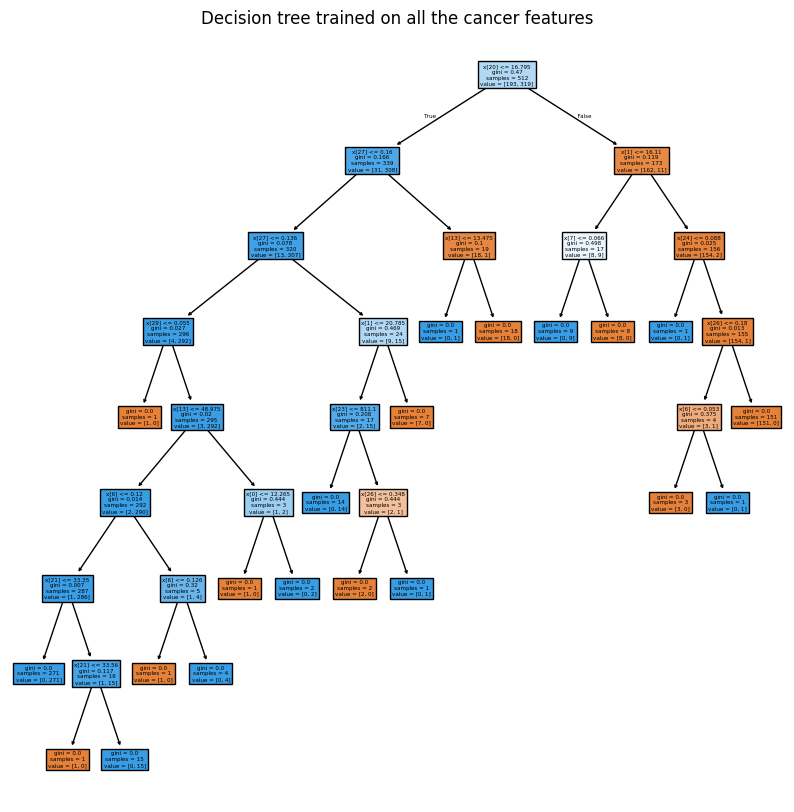

In [ ]:
plt.figure(figsize=(10,10))
plot_tree(dtf, filled=True)
plt.title("Decision tree trained on all the cancer features")
plt.show()

### Находим оптимальные гиперпараметры

In [ ]:
param_grid = {
    'splitter': ['best', 'random'],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10],
    'criterion' :['gini', 'entropy','log_loss']
}

In [ ]:
CV_dtf = GridSearchCV(estimator=dtf, param_grid=param_grid, cv= 5)
CV_dtf.fit(X, Y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [ ]:
CV_dtf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'splitter': 'random'}

In [ ]:
CV_dtf.best_score_

np.float64(0.9507995652848937)

Построим модель DesicionTree с найденными оптимальными параметрами: обучим на X_train, проверим на X_test

In [ ]:
dtf = DecisionTreeClassifier(random_state=0, criterion = 'gini', max_depth=8, max_features='log2', splitter='random')
dtf.fit(X_train,Y_train)
pred_1=dtf.predict(X_test)

In [ ]:
print('accuracy',accuracy_score(Y_test,pred_1))
print('precision',precision_score(Y_test,pred_1))
print('recall',recall_score(Y_test,pred_1))
df1=pd.crosstab(Y_test,pred_1)
df1

accuracy 0.8947368421052632
precision 0.9444444444444444
recall 0.8947368421052632


col_0,0,1
type,,
0,17,2
1,4,34


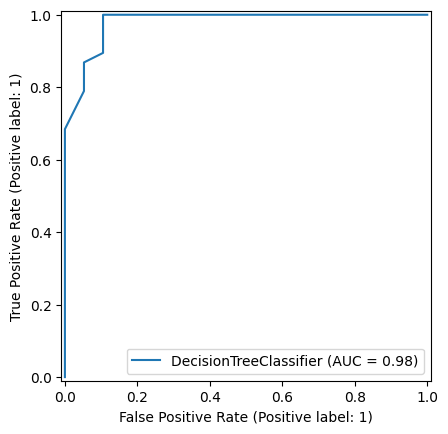

In [ ]:
dtf_disp = RocCurveDisplay.from_estimator(dtf, X_test, Y_test)
plt.show()

## RandomForest

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
pred_2=rf.predict(X_test)
print('accuracy',accuracy_score(Y_test,pred_2))
print('precision',precision_score(Y_test,pred_2))
print('recall',recall_score(Y_test,pred_2))

df1=pd.crosstab(Y_test,pred_2)
df1

accuracy 0.9824561403508771
precision 0.9743589743589743
recall 1.0


col_0,0,1
type,,
0,18,1
1,0,38


In [ ]:
print(classification_report(Y_test,pred_2))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.97      1.00      0.99        38

    accuracy                           0.98        57
   macro avg       0.99      0.97      0.98        57
weighted avg       0.98      0.98      0.98        57



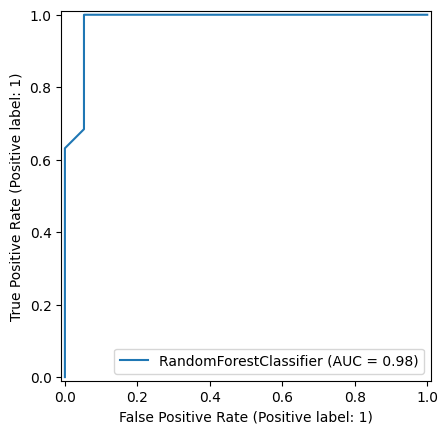

In [ ]:
plt.rcParams.update({'font.size': 10})
dtf_disp = RocCurveDisplay.from_estimator(rf, X_test, Y_test)
plt.show()

In [ ]:
rf.feature_importances_

array([0.02244962, 0.02003764, 0.05989636, 0.04967186, 0.00630643,
       0.00543344, 0.07214019, 0.10120487, 0.0057971 , 0.00273252,
       0.02335587, 0.00476764, 0.01686636, 0.03351279, 0.00236816,
       0.0047056 , 0.00520042, 0.0037329 , 0.00384053, 0.0051931 ,
       0.10979803, 0.01635358, 0.16635468, 0.06920963, 0.01351608,
       0.01551805, 0.02066361, 0.12186116, 0.00655425, 0.01095752])

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [88]:
CV_dtf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_dtf.fit(X, Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [89]:
CV_dtf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

Построим модель RandomForest с найденными оптимальными параметрами: обучим на X_train, проверим на X_test

In [90]:
rf = RandomForestClassifier(max_depth = None, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 5, n_estimators = 50, random_state=0)
rf.fit(X_train,Y_train)
pred_1=rf.predict(X_test)

In [91]:
print('accuracy',accuracy_score(Y_test,pred_2))
print('precision',precision_score(Y_test,pred_2))
print('recall',recall_score(Y_test,pred_2))
rf1=pd.crosstab(Y_test,pred_2)
rf1

accuracy 0.9824561403508771
precision 0.9743589743589743
recall 1.0


col_0,0,1
type,,
0,18,1
1,0,38


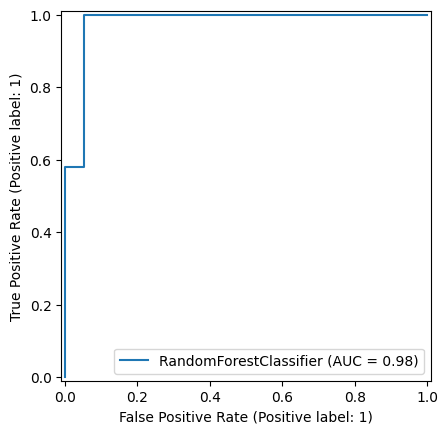

In [92]:
rf_disp = RocCurveDisplay.from_estimator(rf, X_test, Y_test)
plt.show()

## Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=5000, solver='lbfgs', random_state=0)
lr.fit(X_train,Y_train)
pred_3=lr.predict(X_test)
print('accuracy',accuracy_score(Y_test,pred_3))
print('precision',precision_score(Y_test,pred_3))
print('recall',recall_score(Y_test,pred_3))

lr1=pd.crosstab(Y_test,pred_3)
lr1

In [ ]:
print(classification_report(Y_test,pred_3))

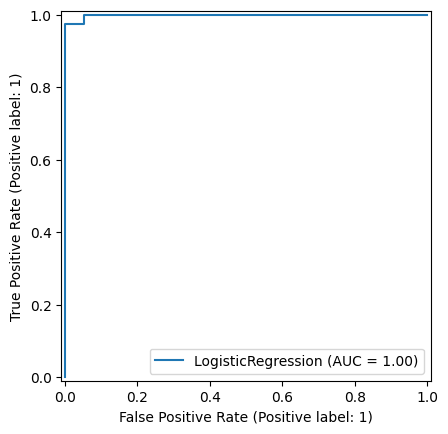

In [95]:
plt.rcParams.update({'font.size': 10})
lr_disp = RocCurveDisplay.from_estimator(lr, X_test, Y_test)
plt.show()

In [ ]:
param_grid = [
    {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1'],
        'solver': ['liblinear'],
        'max_iter': [5000, 5500, 6000, 6500]
    },
    {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['liblinear', 'sag'],
        'max_iter': [5000, 5500, 6000, 6500]
    }
]


In [ ]:
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv= 5)
CV_lr.fit(X, Y)

In [ ]:
CV_lr.best_params_

Построим модель LogisticRegression с найденными оптимальными параметрами: обучим на X_train, проверим на X_test

In [ ]:
lr = LogisticRegression(max_iter=5000, C = 100, penalty = 'l1', solver = 'liblinear', random_state=0)
lr.fit(X_train,Y_train)
pred_1=lr.predict(X_test)

In [ ]:
print('accuracy',accuracy_score(Y_test,pred_3))
print('precision',precision_score(Y_test,pred_3))
print('recall',recall_score(Y_test,pred_3))
lr1=pd.crosstab(Y_test,pred_3)
lr1

In [ ]:
plt.rcParams.update({'font.size': 10})
dtf_disp = RocCurveDisplay.from_estimator(lr, X_test, Y_test)
plt.show()

## GradientBoosting

In [ ]:
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train,Y_train)
pred_4=gb.predict(X_test)
print('accuracy',accuracy_score(Y_test,pred_4))
print('precision',precision_score(Y_test,pred_4))
print('recall',recall_score(Y_test,pred_4))

gb1=pd.crosstab(Y_test,pred_4)
gb1

In [ ]:
print(classification_report(Y_test,pred_4))

In [ ]:
plt.rcParams.update({'font.size': 10})
gb_disp = RocCurveDisplay.from_estimator(gb, X_test, Y_test)
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
CV_gb = GridSearchCV(estimator=gb, param_grid=param_grid, cv= 5)
CV_gb.fit(X, Y)

In [ ]:
CV_gb.best_params_

Построим модель GradientBoosting с найденными оптимальными параметрами: обучим на X_train, проверим на X_test

In [ ]:
gb = GradientBoostingClassifier(learning_rate= 0.1,max_depth= 3,min_samples_leaf= 4,min_samples_split= 10,n_estimators= 200)
gb.fit(X_train,Y_train)
pred_4=gb.predict(X_test)

In [ ]:
print('accuracy',accuracy_score(Y_test,pred_4))
print('precision',precision_score(Y_test,pred_4))
print('recall',recall_score(Y_test,pred_4))
gb1=pd.crosstab(Y_test,pred_4)
gb1

In [ ]:
plt.rcParams.update({'font.size': 10})
gb_disp = RocCurveDisplay.from_estimator(gb, X_test, Y_test)
plt.show()

# Используем VotingClassifer

In [ ]:
models = [
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
]

In [ ]:
params = {
    'dt__max_features': [None, 'sqrt', 'log2'],
    'dt__criterion' :['gini', 'entropy','log_loss'],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2'],
}

In [ ]:
voting_clf = VotingClassifier(estimators=models, voting='soft')
grid = GridSearchCV(estimator=voting_clf, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
ereg = grid.fit(X_train, Y_train)
pred_ereg = ereg.predict(X_test)

Здесь не все модели и параметры, потому что оно долго считало


In [ ]:
print('accuracy 1',accuracy_score(Y_test,pred_1))
print('accuracy 2',accuracy_score(Y_test,pred_2))
print('accuracy 3',accuracy_score(Y_test,pred_3))
print('accuracy 4',accuracy_score(Y_test,pred_4))
print('accuracy',accuracy_score(Y_test,pred_ereg))

# Выбросы

In [ ]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(50, 50))
sns.boxplot(data=df)
plt.xticks(rotation=90)

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df.loc[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [ ]:
X = df_no_outliers.drop(columns=['type'])
y = df_no_outliers['type']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('Accuracy до удаления выбросов:', accuracy_score(Y_test,pred_ereg))

grid = GridSearchCV(estimator=voting_clf, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
ereg = grid.fit(X_train, Y_train)
pred_ereg = ereg.predict(X_test)
print('Новый Accuracy:', accuracy_score(Y_test,pred_ereg))